In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_pickle('model2_df.pkl')

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,country,year,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,0.329304,16.815920,4.003690,5.771441,4.477337,-4.605170,2.344203,8.784468,2.501436,3.178054,2.104134,3.178054,-2.302585,4.741099,0.832909,0.916291,-1.084709,1.704748,-3.516740,-3.215879,-5.144662,-7.272442,-6.972513,-4.462395,-4.520381,-4.442063,-3.410152,-4.759890,1.740466
1,Afghanistan,2005,0.916291,17.037214,4.048301,5.673323,4.442651,-3.912023,0.328330,7.167038,2.653242,4.060443,2.163323,4.060443,-2.302585,3.230572,2.960105,2.970414,-0.926341,2.066863,-3.518260,-3.210853,-5.133948,-7.224127,-6.966212,-4.458553,-4.526165,-4.432896,-3.475229,-4.762380,1.840550
2,Afghanistan,2010,0.336472,17.175996,4.074142,5.631212,4.304065,-4.605170,4.378011,7.595387,2.815409,4.189655,2.219203,4.189655,-2.302585,6.315953,2.912351,2.912351,-0.802962,2.219203,-3.513482,-3.200396,-5.132763,-7.133789,-6.945590,-4.447859,-4.502669,-4.429499,-3.548795,-4.756794,1.629241
3,Afghanistan,2015,0.095310,17.334091,4.174387,5.572154,4.127134,-4.605170,4.266611,7.050989,2.949688,1.791759,2.099244,4.174387,-2.302585,6.370345,2.844909,2.850707,-0.736055,2.312535,-3.470152,-3.160303,-5.076677,-7.006285,-6.890255,-4.424878,-4.484855,-4.379448,-3.583286,-4.735905,1.568616
4,Albania,2000,1.091444,14.943368,4.284965,2.397895,0.000000,1.297463,4.518648,6.495266,3.806662,4.574711,1.834180,4.574711,-2.302585,7.069695,0.741937,0.788457,-0.421594,2.370244,-3.842231,-3.412864,-5.093523,-7.050250,-6.196540,-4.762292,-4.697509,-4.030747,-4.327489,-4.740356,1.704748


In [48]:
df.drop(columns=conduct_disorder_percentage_of_population)

,country,year,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,0.329304,16.815920,4.003690,5.771441,4.477337,-4.605170,2.344203,8.784468,2.501436,3.178054,2.104134,3.178054,-2.302585,4.741099,0.832909,0.916291,-1.084709,1.704748,-3.516740,-3.215879,-5.144662,-7.272442,-6.972513,-4.462395,-4.442063,-3.410152,-4.759890,1.740466
1,Afghanistan,2005,0.916291,17.037214,4.048301,5.673323,4.442651,-3.912023,0.328330,7.167038,2.653242,4.060443,2.163323,4.060443,-2.302585,3.230572,2.960105,2.970414,-0.926341,2.066863,-3.518260,-3.210853,-5.133948,-7.224127,-6.966212,-4.458553,-4.432896,-3.475229,-4.762380,1.840550
2,Afghanistan,2010,0.336472,17.175996,4.074142,5.631212,4.304065,-4.605170,4.378011,7.595387,2.815409,4.189655,2.219203,4.189655,-2.302585,6.315953,2.912351,2.912351,-0.802962,2.219203,-3.513482,-3.200396,-5.132763,-7.133789,-6.945590,-4.447859,-4.429499,-3.548795,-4.756794,1.629241
3,Afghanistan,2015,0.095310,17.334091,4.174387,5.572154,4.127134,-4.605170,4.266611,7.050989,2.949688,1.791759,2.099244,4.174387,-2.302585,6.370345,2.844909,2.850707,-0.736055,2.312535,-3.470152,-3.160303,-5.076677,-7.006285,-6.890255,-4.424878,-4.379448,-3.583286,-4.735905,1.568616
4,Albania,2000,1.091444,14.943368,4.284965,2.397895,0.000000,1.297463,4.518648,6.495266,3.806662,4.574711,1.834180,4.574711,-2.302585,7.069695,0.741937,0.788457,-0.421594,2.370244,-3.842231,-3.412864,-5.093523,-7.050250,-6.196540,-4.762292,-4.030747,-4.327489,-4.740356,1.704748
5,Albania,2005,0.875469,14.917945,4.297285,2.708050,0.000000,1.640937,3.295582,1.791759,3.910021,4.574711,1.811562,4.584967,-2.302585,5.631724,0.587787,0.587787,-0.378336,2.379546,-3.755292,-3.357466,-5.034093,-6.960276,-6.139438,-4.767723,-3.972525,-4.414187,-4.735779,1.902108
6,Albania,2010,1.193922,14.884701,4.333361,4.510860,0.000000,1.663926,3.733441,2.302585,3.994524,4.595120,1.675226,4.595120,-2.302585,6.203262,0.336472,0.405465,-0.321584,2.525729,-3.713659,-3.350650,-5.017762,-6.932161,-6.099900,-4.852158,-3.927849,-4.538307,-4.763071,2.054124
7,Albania,2015,1.280934,14.873545,4.354141,4.304065,0.000000,1.526056,5.899829,2.302585,4.060443,4.595120,1.791759,4.595120,-2.302585,8.282541,0.182322,0.262364,-0.271809,2.653242,-3.656483,-3.334600,-4.988449,-6.866818,-6.058136,-4.930540,-3.878555,-4.600867,-4.780930,1.791759
8,Algeria,2000,1.128918,17.255405,4.266896,4.976734,3.044522,-1.386294,5.039909,2.302585,3.793239,4.454347,1.249902,4.454347,-2.302585,7.471464,1.871802,1.856298,-0.452557,2.370244,-3.413876,-3.016341,-4.824192,-6.316136,-6.489053,-4.388279,-4.164258,-4.138850,-4.641485,1.410987
9,Algeria,2005,1.029619,17.320721,4.289089,4.912655,2.944439,-0.693147,0.935671,7.741534,3.889777,4.477337,1.175573,4.477337,-2.302585,3.437927,1.808289,1.791759,-0.385662,2.484907,-3.350723,-2.975774,-4.765601,-6.233912,-6.386976,-4.417894,-4.073166,-4.167141,-4.637116,1.335001


In [49]:
df.describe()

,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.316549,15.866849,4.228789,4.691502,2.075008,0.204313,4.936624,4.828333,3.380519,4.260299,1.707233,4.261396,-1.230815,7.438327,1.103659,1.102594,-0.451151,2.446457,-3.423649,-3.334594,-5.023429,-6.623587,-6.247972,-4.692163,-4.883850,-4.069468,-4.490796,-4.804168,2.100201
std,0.475209,1.759838,0.152261,1.031100,1.768293,2.402223,2.138179,2.826664,0.851516,0.661741,0.412157,0.649883,1.578269,1.865827,1.071644,1.101054,0.288345,0.330401,0.247388,0.298270,0.320747,0.591390,0.360434,0.426161,0.305269,0.247454,0.616969,0.122260,0.681821
min,-0.223144,11.303808,3.591818,0.000000,0.000000,-4.605170,-2.225106,0.000000,0.336472,1.098612,0.095310,1.098612,-2.302585,1.304528,-2.302585,-2.302585,-1.374366,1.029619,-5.414584,-5.415642,-7.150799,-9.141314,-8.542050,-6.193321,-6.487249,-6.185281,-6.127810,-6.671075,-0.356675
25%,0.993252,14.913484,4.143135,4.262680,0.000000,-0.755023,3.450172,2.708050,2.917771,4.317488,1.543298,4.343805,-2.302585,6.161680,0.336472,0.405465,-0.663588,2.302585,-3.593405,-3.561764,-5.262105,-7.087734,-6.561809,-5.016654,-5.136718,-4.267318,-5.007250,-4.830648,1.609438
50%,1.252763,15.961284,4.282206,4.912655,1.945910,1.217876,5.039909,4.905275,3.756538,4.521789,1.784140,4.521789,-2.302585,7.413301,1.098612,1.163151,-0.365283,2.517696,-3.460915,-3.386060,-5.005152,-6.737124,-6.213297,-4.685508,-4.808868,-4.066588,-4.546694,-4.795285,2.116256
75%,1.648659,16.989626,4.334673,5.411646,3.465736,2.017566,6.446336,6.899723,4.034241,4.574711,1.930071,4.574711,-0.223144,8.755605,1.974081,1.974081,-0.229413,2.674149,-3.257735,-3.104461,-4.777923,-6.187322,-5.976526,-4.325006,-4.615057,-3.839482,-3.943045,-4.756074,2.572612
max,2.302585,21.038967,4.488636,6.525030,7.495542,2.742130,9.633519,12.265204,4.351567,4.595120,2.612273,4.595120,3.658420,11.381070,3.321432,3.353407,-0.053401,3.015535,-2.854435,-2.566807,-4.294298,-5.360175,-5.283158,-3.842691,-4.380946,-3.596399,-3.275999,-4.446389,3.925926


In [50]:
df.columns

Index(['country', 'year', 'corruption', 'population', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 'hivaids',
       'gdp', 'thinness___years', 'thinness__years',
       'income_composition_of_resources', 'schooling',
       'depressive_disorders_percentage_of_population',
       'anxiety_disorders_percentage_of_population',
       'bipolar_disorder_percentage_of_population',
       'eating_disorders_percentage_of_population',
       'schizophrenia_percentage_of_population',
       'attentiondeficithyperactivity_disorder_percentage_of_population',
       'conduct_disorder_percentage_of_population',
       'other_disorders_percentage_of_population',
       'developmental_intellectual_disability_percentage_of_population',
       'autistic_spectrum_disorders_percentage_of_population',
       'suicide_rate_per__population'],
      dtype='object')

In [91]:
X = df.loc[:, ['corruption', 'population', 'life_expectancy',
       'adult_mortality', 'alcohol', 'percentage_expenditure', 'measles',
       'bmi', 'polio', 'hivaids', 'gdp', 'thinness___years',
       'income_composition_of_resources', 'schooling',
       'depressive_disorders_percentage_of_population',
       'anxiety_disorders_percentage_of_population',
       'bipolar_disorder_percentage_of_population',
       'eating_disorders_percentage_of_population',
       'schizophrenia_percentage_of_population',
       'attentiondeficithyperactivity_disorder_percentage_of_population',
       'conduct_disorder_percentage_of_population',
       'developmental_intellectual_disability_percentage_of_population',
       'autistic_spectrum_disorders_percentage_of_population']]
y = df['suicide_rate_per__population']

In [92]:
y = y.astype(float)

In [93]:
y.dtypes

dtype('float64')

In [95]:
X.dtypes

corruption                                                         float64
population                                                         float64
life_expectancy                                                    float64
adult_mortality                                                    float64
alcohol                                                            float64
percentage_expenditure                                             float64
measles                                                            float64
bmi                                                                float64
polio                                                              float64
hivaids                                                            float64
gdp                                                                float64
thinness___years                                                   float64
income_composition_of_resources                                    float64
schooling                

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [97]:
X_test.shape

(112, 23)

In [98]:
# Fit Standard Scaler to training data
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
# Applying the scaler to the train set
X_tr = std.transform(X_train.values)

In [100]:
# Applying the scaler to the test set
X_te = std.transform(X_test.values)

In [101]:
df.dtypes

country                                                             object
year                                                                object
corruption                                                         float64
population                                                         float64
life_expectancy                                                    float64
adult_mortality                                                    float64
infant_deaths                                                      float64
alcohol                                                            float64
percentage_expenditure                                             float64
measles                                                            float64
bmi                                                                float64
polio                                                              float64
total_expenditure                                                  float64
diphtheria               

In [102]:
X_tr.shape

(445, 23)

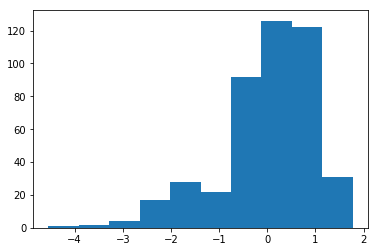

In [103]:
plt.hist(X_tr[:,3]);

In [104]:
X_tr.shape

(445, 23)

In [105]:
y_train.shape

(445,)

In [106]:
X.describe()

,corruption,population,life_expectancy,adult_mortality,alcohol,percentage_expenditure,measles,bmi,polio,hivaids,gdp,thinness___years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.316549,15.866849,4.228789,4.691502,0.204313,4.936624,4.828333,3.380519,4.260299,-1.230815,7.438327,1.103659,-0.451151,2.446457,-3.423649,-3.334594,-5.023429,-6.623587,-6.247972,-4.692163,-4.883850,-4.490796,-4.804168
std,0.475209,1.759838,0.152261,1.031100,2.402223,2.138179,2.826664,0.851516,0.661741,1.578269,1.865827,1.071644,0.288345,0.330401,0.247388,0.298270,0.320747,0.591390,0.360434,0.426161,0.305269,0.616969,0.122260
min,-0.223144,11.303808,3.591818,0.000000,-4.605170,-2.225106,0.000000,0.336472,1.098612,-2.302585,1.304528,-2.302585,-1.374366,1.029619,-5.414584,-5.415642,-7.150799,-9.141314,-8.542050,-6.193321,-6.487249,-6.127810,-6.671075
25%,0.993252,14.913484,4.143135,4.262680,-0.755023,3.450172,2.708050,2.917771,4.317488,-2.302585,6.161680,0.336472,-0.663588,2.302585,-3.593405,-3.561764,-5.262105,-7.087734,-6.561809,-5.016654,-5.136718,-5.007250,-4.830648
50%,1.252763,15.961284,4.282206,4.912655,1.217876,5.039909,4.905275,3.756538,4.521789,-2.302585,7.413301,1.098612,-0.365283,2.517696,-3.460915,-3.386060,-5.005152,-6.737124,-6.213297,-4.685508,-4.808868,-4.546694,-4.795285
75%,1.648659,16.989626,4.334673,5.411646,2.017566,6.446336,6.899723,4.034241,4.574711,-0.223144,8.755605,1.974081,-0.229413,2.674149,-3.257735,-3.104461,-4.777923,-6.187322,-5.976526,-4.325006,-4.615057,-3.943045,-4.756074
max,2.302585,21.038967,4.488636,6.525030,2.742130,9.633519,12.265204,4.351567,4.595120,3.658420,11.381070,3.321432,-0.053401,3.015535,-2.854435,-2.566807,-4.294298,-5.360175,-5.283158,-3.842691,-4.380946,-3.275999,-4.446389


In [107]:
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X,y.values.reshape(557,1))

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
y.shape

(557,)

In [109]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [110]:
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [112]:
lamb = []
alpha = []
lm_reg_r2=[]
for n in np.linspace(0,.05,100):
    for k in np.linspace(0,1,10):
        lm_reg =ElasticNet(alpha =n,l1_ratio=k)
        lamb.append(n)
        alpha.append(k)
        lm_reg_r2.append(np.mean(cross_val_score(lm_reg, X= X_tr, y=y_train, cv=kf, scoring='r2')))
        

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/pyt

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWar

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

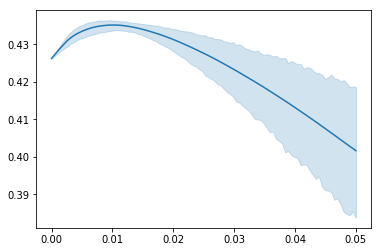

In [113]:
sns.lineplot(x=lamb, y=lm_reg_r2)

In [114]:
alpha_vals = np.array([lamb,alpha,lm_reg_r2])


In [115]:
d = {'Lambda': lamb, 'Alpha' :alpha, 'R2': lm_reg_r2}
alpha_vals = pd.DataFrame(d)


In [116]:
alpha_vals = alpha_vals.sort_values(by=['R2'], ascending=False).reset_index(drop=True)

In [117]:
alpha_vals.head()

# Alpha = ridge vs lasso , 1 = lasso, 0 =ridge

,Lambda,Alpha,R2
0,0.006566,1.000000,0.437109
1,0.007071,0.888889,0.437067
2,0.007576,0.888889,0.437065
3,0.008081,0.777778,0.437061
4,0.009596,0.666667,0.437052


In [118]:
best_alpha = alpha_vals.Alpha[0]
best_alpha

1.0

In [119]:
ElasticNet

sklearn.linear_model.coordinate_descent.ElasticNet

In [120]:
regr = ElasticNet(alpha=.009394, l1_ratio=1)
fit = regr.fit(X_tr, y_train)
fit

ElasticNet(alpha=0.009394, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
print(regr.coef_)

[ 0.07653842  0.02873197 -0.19660441  0.05520448  0.11839689  0.
 -0.01438736  0.03518625  0.01905879 -0.         -0.02382384 -0.00613107
 -0.          0.          0.38024886 -0.08471208  0.         -0.18818962
  0.04592869 -0.08554589 -0.07562748 -0.16566607 -0.04147044]


In [122]:
test_set_predict = regr.predict(X_te)

In [123]:
r2_score(y_test, test_set_predict)

0.5576365179277357

In [124]:
updated_coef = list(zip(X_train.columns, regr.coef_))
updated_coef

[('corruption', 0.07653841715197736),
 ('population', 0.02873197187332765),
 ('life_expectancy', -0.19660441106189583),
 ('adult_mortality', 0.055204481318877154),
 ('alcohol', 0.11839689296442593),
 ('percentage_expenditure', 0.0),
 ('measles', -0.014387359026465096),
 ('bmi', 0.03518625485720768),
 ('polio', 0.019058789115385617),
 ('hivaids', -0.0),
 ('gdp', -0.023823837019327103),
 ('thinness___years', -0.006131073422043786),
 ('income_composition_of_resources', -0.0),
 ('schooling', 0.0),
 ('depressive_disorders_percentage_of_population', 0.38024886041195044),
 ('anxiety_disorders_percentage_of_population', -0.08471208463063405),
 ('bipolar_disorder_percentage_of_population', 0.0),
 ('eating_disorders_percentage_of_population', -0.18818962486807875),
 ('schizophrenia_percentage_of_population', 0.04592868899405169),
 ('attentiondeficithyperactivity_disorder_percentage_of_population',
  -0.0855458944551777),
 ('conduct_disorder_percentage_of_population', -0.0756274795266346),
 ('dev

In [125]:
X_tr

array([[ 0.49996424,  1.21844322,  1.21030633, ..., -1.18694617,
        -1.33768635, -1.56201908],
       [-1.22197804,  0.34729789, -0.21597425, ...,  0.7200296 ,
         0.60557822, -0.03428888],
       [-0.60708671, -0.87979376, -0.66314673, ...,  0.62929636,
         0.1778628 , -0.34464788],
       ...,
       [ 0.58903542,  0.09457648,  0.49897853, ...,  0.10984921,
         0.19143069, -0.56350104],
       [ 1.1598551 ,  0.16051445,  0.72129158, ..., -1.0686267 ,
        -0.75315592, -0.92209273],
       [ 1.35139202, -0.30226547, -1.80982302, ...,  1.17365371,
         1.76547831,  0.64252301]])

In [126]:
y_predicted = fit.predict(X_te)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
rmse

0.43039344831459075

In [127]:
coef_df = pd.DataFrame(updated_coef)
coef_df.head(20)

,0,1
0,corruption,0.076538
1,population,0.028732
2,life_expectancy,-0.196604
3,adult_mortality,0.055204
4,alcohol,0.118397
5,percentage_expenditure,0.000000
6,measles,-0.014387
7,bmi,0.035186
8,polio,0.019059
9,hivaids,-0.000000


In [128]:
coef_df.columns=['Feature','Coefficient']
coef_df.head()

,Feature,Coefficient
0,corruption,0.076538
1,population,0.028732
2,life_expectancy,-0.196604
3,adult_mortality,0.055204
4,alcohol,0.118397


In [129]:
coef_df = coef_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
coef_df.head(20)

,Feature,Coefficient
0,depressive_disorders_percentage_of_population,0.380249
1,alcohol,0.118397
2,corruption,0.076538
3,adult_mortality,0.055204
4,schizophrenia_percentage_of_population,0.045929
5,bmi,0.035186
6,population,0.028732
7,polio,0.019059
8,schooling,0.000000
9,percentage_expenditure,0.000000


In [131]:
#predicted values at the bottom, actual rates along the Y